# Project: FBI Gun Background Checks Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives.Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov. 

>The NICS data has one sheet of an .xlsx file, this has been converted to a .csv file to enable it being read by pandas. It contains the number of firearm checks by month, state, and type. 
The U.S. census data is found in a .csv file which contains population estimates of 2010 and 2016 for all states.


### Questions for Analysis:
>1. Which categories of guns have the highest number of background checks?
>2. Which state has the highest background checks per capita? 
>3. What is the overall trend of background checks from 1998-2017?
>4. Which month(s) of the year have the highest background checks?

In [1]:
# Import statement for packages used for this analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load the datasets using pandas. Note the census .xlsx file has already been converted to .csv
gun_data = pd.read_csv('gun-data.csv')
census_data = pd.read_csv('u.s.-census-data.csv')

>The next step after gathering the datasets is to assess the data, check for null values, missing data, convert datatypes and drop columns where their values are insignificant.

In [3]:
gun_data.head() #view the first 5 rows of the dataset

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
census_data.head() #view the first 5 rows of the dataset

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [5]:
gun_data.info() #view the list of columns in the datasets and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [6]:
census_data.info() #view the list of columns in the datasets and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [7]:
gun_data.shape #view the number of rows and columns

(12485, 27)

In [8]:
census_data.shape #view the number of rows and columns

(85, 52)

In [9]:
census_data.isnull().sum() #check for NaN in the dataset

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [10]:
sum(gun_data.duplicated()) #check for duplicated rows

0

In [11]:
sum(census_data.duplicated()) #check for duplicated rows

3

In [12]:
gun_data.describe() #view the count, mean, std, min, max for the dataset

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [13]:
census_data.describe() #view the count, mean, std, min, max for the dataset

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2



### Data Cleaning

 *gun_data* table
-  Inaccurate datatype for month, multiple, total columns 
the column 'month' needs to be converted to datetime so that the column can be split into 'year' and 'month'

- Null data on handgun, long_gun and multiple columns

- States ['District of Columbia', 'Guam', 'Virgin Islands', 'Puerto Rico', 'Mariana Islands'] not in census_data

- Drop columns with insignificant values
the columns 'multiple' and 'total' should be converted to float to be in uniform with the other data types

*census_data* table

- Rename column headers to be more efficient

- Drop rows 64:84 as they are footnotes, they do no contain values

- Inaccurate datatype for all columns

- Transpose column headers to rows, to make the dataset uniform

### Cleaning process

In [14]:
census_df = census_data.copy() #make a copy of the original dataset where the cleaning process is done
gun_df = gun_data.copy()

**Convert 'month' datatype from string to datetime using pandas function**

In [15]:
gun_df['month'] = pd.to_datetime(gun_df['month']) #convert month to datetime

In [16]:
gun_df['year'] = gun_df['month'].dt.year #extract year from the month column to make a new column

**Drop the following variables from the table, their values will not be used in the data analysis process**

In [17]:
gun_df.drop(['permit', 'permit_recheck', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other',
             'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 
             'returned_other', 'rentals_handgun',  'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 
             'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other'], axis=1, inplace=True)

In [18]:
gun_df.head(2) #view the changes

,month,state,handgun,long_gun,other,multiple,totals,year
0,2017-09-01,Alabama,5734.0,6320.0,221.0,317,32019,2017
1,2017-09-01,Alaska,2320.0,2930.0,219.0,160,6303,2017


**Convert multple, totals columns from string to float**

In [19]:
gun_df['multiple'] = gun_df['multiple'].astype(float)
gun_df['totals']= gun_df['totals'].astype(float)

**Check for null values in the table**

In [20]:
gun_df.isnull().sum()

month          0
state          0
handgun       20
long_gun      19
other       6985
multiple       0
totals         0
year           0
dtype: int64

**Replace null values with the mean**

In [21]:
mean = gun_df.handgun.mean() #find the mean for the columns
gun_df.handgun = gun_df.handgun.fillna(mean)

mean = gun_df.long_gun.mean()
gun_df.long_gun = gun_df.long_gun.fillna(mean)

mean = gun_df.other.mean()
gun_df.other = gun_df.other.fillna(mean) #fill the mean values in place of null

In [22]:
gun_df.isnull().sum() #check again to know if the null values are now filled

month       0
state       0
handgun     0
long_gun    0
other       0
multiple    0
totals      0
year        0
dtype: int64

**View the changes of the adjusted table**

In [23]:
gun_df.head()

,month,state,handgun,long_gun,other,multiple,totals,year
0,2017-09-01,Alabama,5734.0,6320.0,221.0,317.0,32019.0,2017
1,2017-09-01,Alaska,2320.0,2930.0,219.0,160.0,6303.0,2017
2,2017-09-01,Arizona,11063.0,7946.0,920.0,631.0,28394.0,2017
3,2017-09-01,Arkansas,4347.0,6063.0,165.0,366.0,17747.0,2017
4,2017-09-01,California,37165.0,24581.0,2984.0,0.0,123506.0,2017


**View the census_df table**

In [24]:
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


**Drop the 'Fact Note' column, the data is not needed**

In [25]:
census_df.drop(['Fact Note'], axis=1, inplace=True)

**View the rows in the table**

In [26]:
census_df.iloc[3:]

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
census_df.drop((census_df.index[2:85]), inplace=True)  #remove rows that i won't be using for the analysis

**Switch the rows and columns to make the dataset uniform with gun_df**

In [28]:
census_df = census_df.transpose() #switch rows to columns

In [29]:
census_df.head(2) #view the changes

,0,1
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2..."
Alabama,"4,863,300","4,780,131"


**Set the column headers**

In [30]:
new_header = census_df.iloc[0] #select the first row for the header
census_df = census_df[1:] #remove the header row
census_df.columns = new_header #set the new header row

In [31]:
census_df.reset_index(inplace=True) #reset the index

In [32]:
census_df.head(2) #view the changes

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
0,Alabama,"4,863,300","4,780,131"
1,Alaska,"741,894","710,249"


**Rename column headers to be more appropriate**

In [33]:
census_df.rename(columns={'index' : 'state',
                          'Population estimates, July 1, 2016,  (V2016)' : 'pop_est2016', 
                          'Population estimates base, April 1, 2010,  (V2016)': 'pop_est2010'}, inplace=True)

In [34]:
census_df.dtypes #check the datatypes of the table

Fact
state          object
pop_est2016    object
pop_est2010    object
dtype: object

**Replace ',' and convert *pop_est2016* datatype from string to float**

In [35]:
census_df['pop_est2016'] = (census_df['pop_est2016'].str.replace(',',''))

census_df['pop_est2016'] = census_df['pop_est2016'].astype(float)

**Replace ',' and convert *pop_est2010* datatype from string to float**

In [36]:
census_df['pop_est2010'] = (census_df['pop_est2010'].str.replace(',',''))

census_df['pop_est2010'] = census_df['pop_est2010'].astype(float)

In [37]:
census_df.dtypes #check the changes made

Fact
state           object
pop_est2016    float64
pop_est2010    float64
dtype: object

**Count the number of states for both datasets to check if they are equal**

In [38]:
census_df.state.nunique() #counts the number of unique values

50

In [39]:
gun_df.state.nunique() #gun_df has additional 5 states

55

**Drop the states are not in census_df**

In [40]:
drop_states = ['District of Columbia', 'Guam', 'Virgin Islands', 'Puerto Rico', 'Mariana Islands']
gun_df = gun_df.query('state not in @drop_states')

In [41]:
gun_df.state.nunique() #check the changes made

50

In [42]:
census_df.head(2) #view the changes made

Fact,state,pop_est2016,pop_est2010
0,Alabama,4863300.0,4780131.0
1,Alaska,741894.0,710249.0


**Merge the cleaned datasets to one table**

In [43]:
gun_merged = gun_df.merge(census_df, on='state', how='inner')

In [44]:
gun_merged.head() #view the merged datasets

,month,state,handgun,long_gun,other,multiple,totals,year,pop_est2016,pop_est2010
0,2017-09-01,Alabama,5734.0,6320.0,221.0,317.0,32019.0,2017,4863300.0,4780131.0
1,2017-08-01,Alabama,6289.0,6045.0,216.0,311.0,35038.0,2017,4863300.0,4780131.0
2,2017-07-01,Alabama,6046.0,4790.0,224.0,258.0,31474.0,2017,4863300.0,4780131.0
3,2017-06-01,Alabama,8275.0,4782.0,254.0,334.0,35687.0,2017,4863300.0,4780131.0
4,2017-05-01,Alabama,7198.0,4559.0,254.0,309.0,33331.0,2017,4863300.0,4780131.0


> This table shows the month, year and state variables and values for handgun, long_gun, multiple and other checks. From this table, we can be able to get information on the number of background checks by gun types, year , state, month and gun per capita.

<a id='eda'></a>
## Exploratory Data Analysis


### Q1- Which categories of guns have the highest background checks?

In [45]:
#get the sum of handgun checks over the years
gun_merged['handgun'].sum()

73880599.0

In [46]:
#get the sum of long_gun checks over the years
gun_merged['long_gun'].sum()

97331240.0

In [47]:
#get the sum of multiple checks over the years
gun_merged['multiple'].sum()

3348925.0

In [48]:
#get the sum of other checks over the years
gun_merged['other'].sum()

4269256.89090909

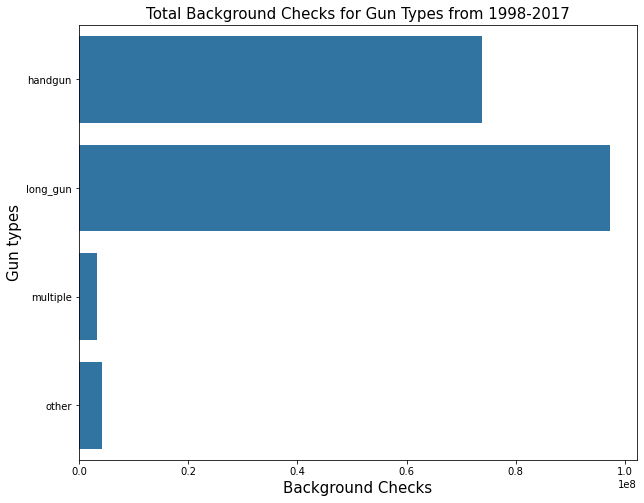

In [4]:
#plot a horizontal barchart showing the total for gun types
gun = ['handgun', 'long_gun', 'multiple', 'other']
data=[73880599, 97331240, 3348925, 4269256]
plt.figure(figsize=(10,8))
base_color = sns.color_palette()[0]
gun_ax =sns.barplot(data, gun, color=base_color)
gun_ax.set_xlabel('Background Checks', fontsize=15)
gun_ax.set_ylabel('Gun types', fontsize=15)
gun_ax.set_title('Total Background Checks for Gun Types from 1998-2017', fontsize=15)
plt.show()

> From this chart, long_gun has the highest checks, followed by handgun with multiple guns as the lowest over the years.

In [50]:
#write a function to plot the histogram of gun type variables 
def draw_hist(data, x_label, y_label, p_title):
    data.hist()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(p_title)

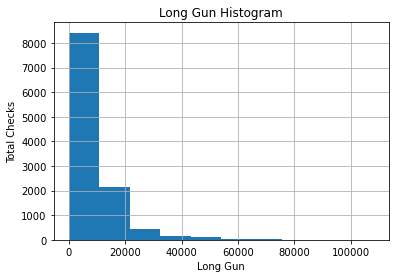

In [51]:
#histogram chart for long_gun variable
draw_hist(gun_merged['long_gun'], 'Long Gun', 'Total Checks', 'Long Gun Histogram')

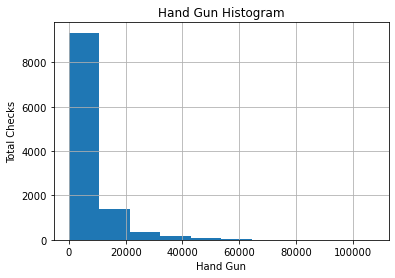

In [52]:
#histogram chart for handgun variable
draw_hist(gun_merged['handgun'], 'Hand Gun', 'Total Checks', 'Hand Gun Histogram')

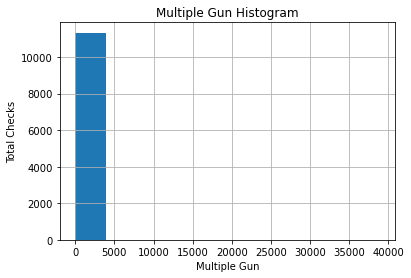

In [53]:
#histogram chart for multiple variable
draw_hist(gun_merged['multiple'], 'Multiple Gun', 'Total Checks', 'Multiple Gun Histogram')

> The histogram distribution of long_gun, handgun variables shows the distribution is right-skewed which means the mean is greater than meadian for the distribution

### Q2- Which state has the highest background checks per capita?

In [54]:
#add the total checks per state by grouping the states and adding their totals
state_totals = gun_merged.groupby('state')['totals'].sum()
state_totals.head()

state
Alabama        6706079.0
Alaska         1137643.0
Arizona        4425714.0
Arkansas       3752633.0
California    19014063.0
Name: totals, dtype: float64

**Plot chart to see the total checks by state**

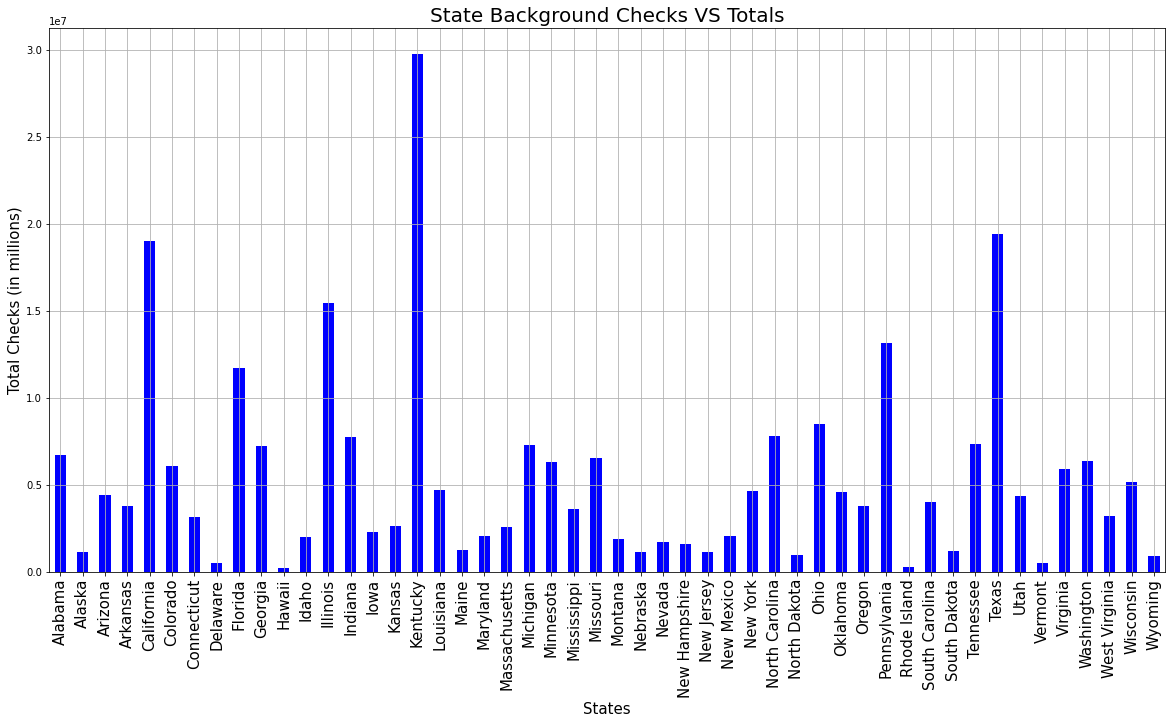

In [55]:
#plot a bar chart to see the the total background checks by state
plt.figure(figsize=(20,10))
state_totals.plot(kind= 'bar', color='blue')
plt.title("State Background Checks VS Totals", fontsize=20)
plt.xlabel("States", fontsize=15)
plt.ylabel("Total Checks (in millions)", fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.grid()
plt.show()

> From this chart, we can see top 5 states with the highest checks: Kentucky, Texas, California, Illinois and Pennsylvania. Hawaii is the state with the lowest number of checks 

**Gun per capita for 2010 & 2016**

In [56]:
#calculate gun per capita for 2010
gun_capita10 = gun_merged.query('year == 2010').groupby('state')['totals'].sum()/gun_merged.groupby('state')['pop_est2010'].min()
gun_capita10.head()

state
Alabama       0.064560
Alaska        0.092797
Arizona       0.032234
Arkansas      0.065654
California    0.021914
dtype: float64

In [57]:
#calculate gun per capita for 2016
gun_capita16 = gun_merged.query('year == 2016').groupby('state')['totals'].sum()/gun_merged.groupby('state')['pop_est2016'].min()
gun_capita16.head()

state
Alabama       0.126858
Alaska        0.118140
Arizona       0.060060
Arkansas      0.089020
California    0.060565
dtype: float64

**Plot the charts for gun_percapita 2010 & 2016**

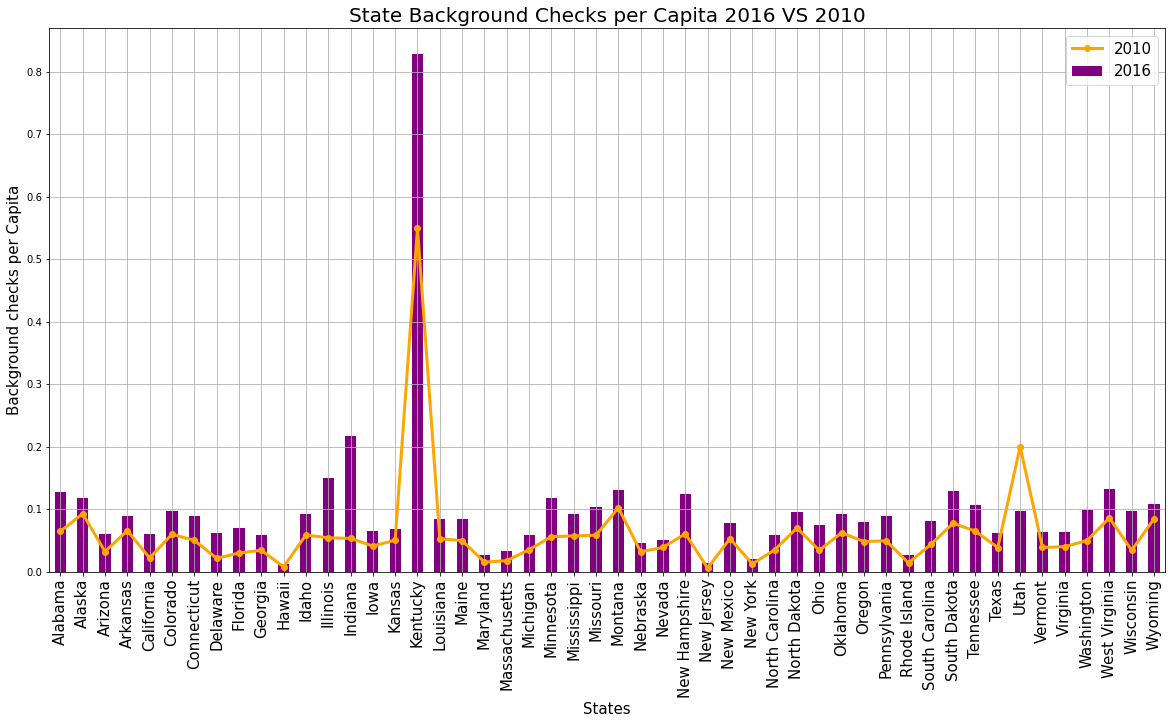

In [58]:
plt.figure(figsize= (20,10)) #set the height and width for the figure 
gun_capita10.plot(kind ='line', linewidth=3, color='orange', marker='o', label= '2010')
gun_capita16.plot(kind ='bar', color= 'purple', label='2016')
plt.title('State Background Checks per Capita 2016 VS 2010', fontsize=20)
plt.xlabel('States', fontsize=15)
plt.ylabel('Background checks per Capita', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show();

> Kentucky is the only state with a sharp difference in gun per capita when compared to other states. This needs to be further investigated to check for inaccurate data. All states show an increase in number of background checks from 2010 to 2016. Utah shows a decrease from 2010 to 2016

### Q3- What is the overall trend of background checksover time from 1998-2017?

In [59]:
#total checks yearly
year_totals = gun_merged.groupby('year')['totals'].sum()
year_totals.head()

year
1998     891376.0
1999    9038315.0
2000    8421486.0
2001    8812457.0
2002    8358574.0
Name: totals, dtype: float64

**Plot chart to view total checks by year**

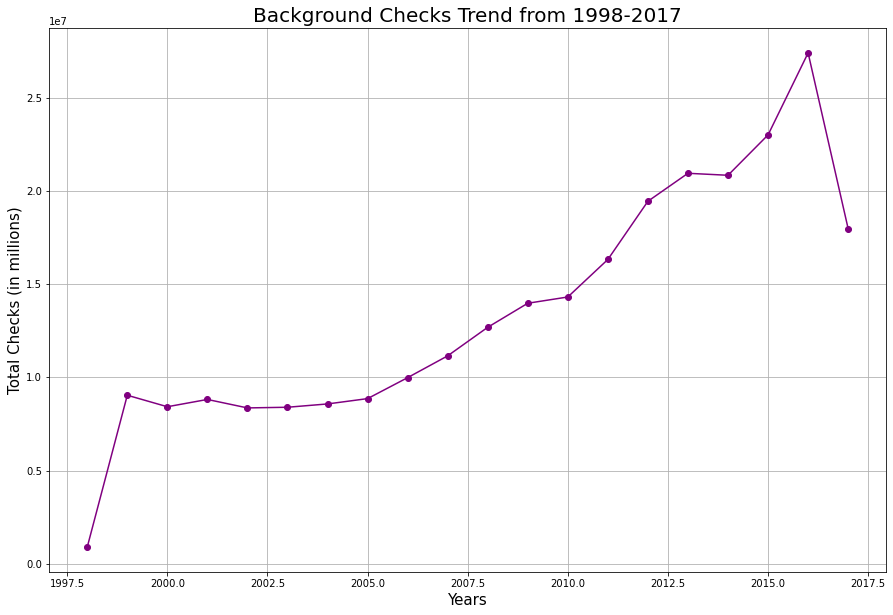

In [60]:
plt.figure(figsize=(15,10))
year_totals.plot(color='purple',marker='o')
plt.title('Background Checks Trend from 1998-2017',fontsize=20)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Total Checks (in millions)', fontsize=15)
plt.grid(True)

> The chart shows a steady number of checks from 1998-2005. Background checks have continued to grow signicantly from 2005 with a slight decrease in 2014

### Q4- Which month(s) of the year have the highest background checks?

In [61]:
gun_merged['month'] = gun_merged['month'].dt.month #extract month from the month column

In [62]:
#get the total checks by month
month_checks= gun_merged.groupby('month')['totals'].sum()
month_checks

month
1     22576465.0
2     24368225.0
3     25337866.0
4     21304597.0
5     18898829.0
6     18547973.0
7     18705500.0
8     20845426.0
9     21603207.0
10    22441249.0
11    24461454.0
12    30301215.0
Name: totals, dtype: float64

**Plot chart to view the total monthly checks**

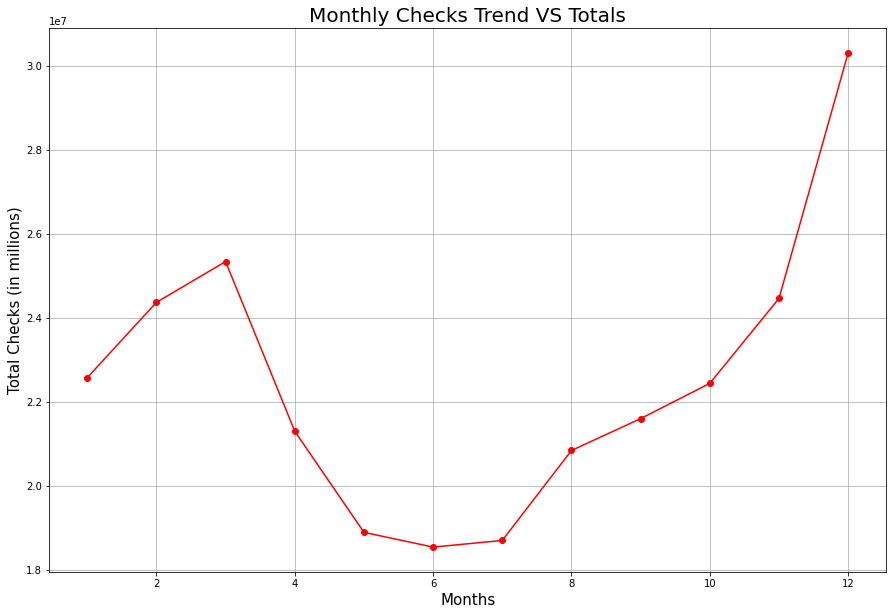

In [63]:
plt.figure(figsize=(15,10))
month_checks.plot(color='red',marker='o')
plt.title('Monthly Checks Trend VS Totals',fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Total Checks (in millions)', fontsize=15)
plt.grid(True)

> This chart shows May, June and July as the months with the lowest number of checks. December is the month with the highest number of checks.

<a id='conclusions'></a>
## Conclusions

>The dataset analysed shows long guns have the highest number of background checks over time, followed closely by hand gun. 
This may be because long guns are used for hunting and sports but there is no statistical data supporting this. Kentucky has the highest number of background checks while Hawaii has the lowest number when the dataset was grouped by state. 
Kentucky is the only state with a sharp difference in gun per capita when compared to other states. This needs to be further investigated to check for inaccurate data.Calculating the background checks per capita for the year 2010 and 2016 per state also shows Kentucky as the highest number. The 2016 census data is more associated with high gun per capita. All states show an increase in background checks per capita from 2010 to 2016 except the state of Utah which showed a decline. 
This needs to be further investigated to know the causating factor.

>The yearly background checks shows that there was a steady rate of background checks till 2006 and has continued to be on the increase since then. Although, there was a slight decrease from the previous year in 2014.
The total monthly background checks show to be very low for the months of May, June and July. December shows the highest number of checks, this may be as a result of the festive period or winter season but there is no statistics backing this statement.

**Limitations**
> Inaccurate datatypes.
Missing or null values. 
Incomplete data for the year 1998 and 2017.
Missing data for US colonies.The census dataset only has population estimate for 2010 and 2016. There is no column to show shootings per state, would have wanted to see the correlation between shootings and background checks.

**Links**

(https://datatofish.com/line-chart-python-matplotlib/)

(https://datascience.stackexchange.com/questions/10783/how-do-i-merge-two-data-frames-in-python-pandas)

(https://stackabuse.com/matplotlib-bar-plot-tutorial-and-examples/

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1